<a href="https://colab.research.google.com/github/Mmmmari/Wotech-Team-2.3/blob/main/WoTech_Python_Lesson15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of rows is 800, number of columns is 13
800
170
123
48
Highest attack score pokemon is MewtwoMega Mewtwo X
Lowest attack score pokemon is Chansey


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Attack_Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Attack above average
0,1,Bulbasaur,Grass,Poison,318,45,49,49,98,65,65,45,1,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,125,80,80,60,1,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,165,100,100,80,1,False,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,223,122,120,80,1,False,True
4,4,Charmander,Fire,NaN,309,39,52,43,95,60,50,65,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,250,100,150,50,6,True,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,270,160,110,110,6,True,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,170,150,130,70,6,True,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,220,170,130,80,6,True,True


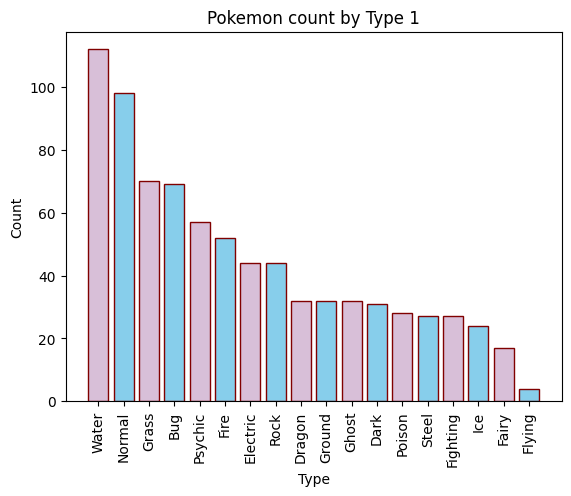

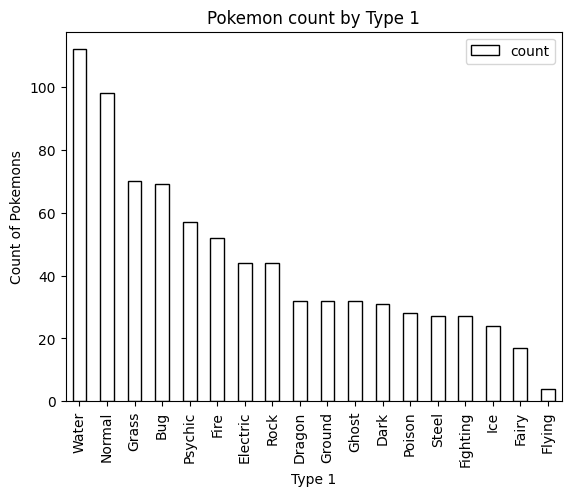

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

pokemon_df = pd.read_csv('/content/Pokemon.csv')
pokemon_df.sample(5)
rows, columns = pokemon_df.shape
print(f'Number of rows is {rows}, number of columns is {columns}')

# How many unique Pokemon names are in this table?
unique_names = pokemon_df['Name'].nunique()
print(unique_names)

# How many pokemons have Attack greater than 100?
attack_over_100 = pokemon_df[pokemon_df['Attack'] > 100]
print(len(attack_over_100))

# How many pokemons have Attack greater than 100?
defense_over_100 = pokemon_df[pokemon_df['Defense'] > 100]
print(len(defense_over_100))

# How many pokemons have both?
def_att_over_100 = pokemon_df[(pokemon_df['Defense'] > 100) & (pokemon_df['Attack'] > 100)]
print(len(def_att_over_100))

# VALUE COUNTS!!! Create a grouped DataFrame that counts the number of Pokemons in each group for Type 1.
type_1_pokemons = pokemon_df['Type 1'].value_counts().reset_index()
type_1_pokemons

# Bar chart 1
plt.bar(type_1_pokemons['Type 1'], type_1_pokemons['count'], color=['thistle','skyblue'], edgecolor='maroon')
plt.title('Pokemon count by Type 1')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Bar chart 2
type_1_pokemons.plot(x = 'Type 1', y = 'count', kind = 'bar', color='white', edgecolor='black')
plt.title('Pokemon count by Type 1')
plt.xlabel('Type 1')
plt.ylabel('Count of Pokemons')

# Which pokemon has the max attack?
max_attack_pokemon = pokemon_df['Name'].iloc[pokemon_df['Attack'].idxmax()]
print(f'Highest attack score pokemon is {max_attack_pokemon}')

# Which pokemon has the min attack?
min_attack_pokemon = pokemon_df['Name'].iloc[pokemon_df['Attack'].idxmin()]
print(f'Lowest attack score pokemon is {min_attack_pokemon}')

# Add a column
pokemon_df['My unique column'] = 'Pokemon'

# Add calculated column
pokemon_df['Attack_Defense'] = pokemon_df['Attack'] + pokemon_df['Defense']
pokemon_df.insert(8, 'Attack_Defense', pokemon_df.pop('Attack_Defense')) # to move the column in a new space

# Quick maths calculations
pokemon_df['Attack'].sum()
pokemon_df['Attack'].min()
pokemon_df['Attack'].max()
pokemon_df['Attack'].mean() #the average
pokemon_df['Attack above average'] = pokemon_df['Attack'] > pokemon_df['Attack'].mean()

# Drop the column
pokemon_df.pop('My unique column')
# or
# pokemon_df = pokemon_df.drop(columns=['My unique column'])
pokemon_df

Histogram counts: [276. 411. 113.]
Bin edges [180. 380. 580. 780.]


array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

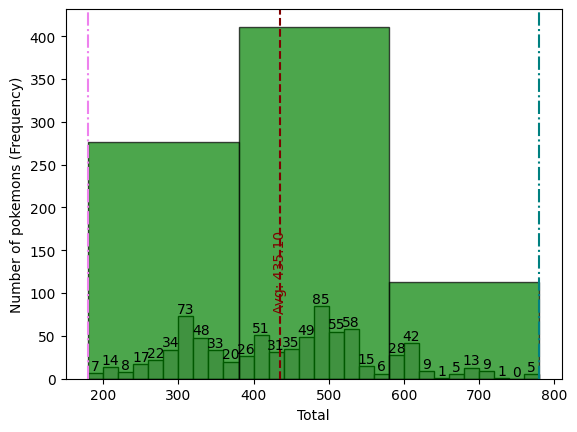

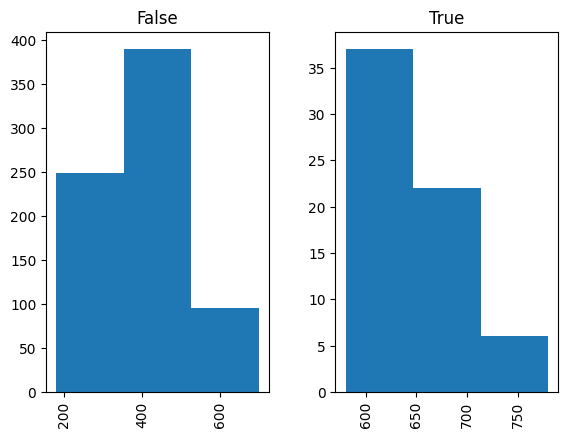

In [71]:
# HISTOGRAM
# analyze Total for each pokemon
n, bins, patches = plt.hist(pokemon_df['Total'], bins=30, color='thistle', edgecolor='black')# altpha - transparency, default = 10 bins
plt.xlabel('Total')
plt.ylabel('Number of pokemons (Frequency)')

# add avg line
plt.axvline(pokemon_df['Total'].mean(), linestyle='dashed', color='maroon')

# add min and max line
plt.axvline(pokemon_df['Total'].min(), linestyle='dashdot', color='violet')
plt.axvline(pokemon_df['Total'].max(), linestyle='dashdot', color='teal')

# Annotate the histogram bins
for i in range(len(bins) - 1):
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, n[i], int(n[i]), ha='center', va='bottom')

# Label the average line
avg = pokemon_df['Total'].mean()
plt.text(avg, plt.ylim()[1] * 0.9, f'Avg: {avg:.2f}', color='maroon', ha='center', rotation=90)

#
value = plt.hist(pokemon_df['Total'], bins = 3, color='green', edgecolor='black', alpha=0.7)
hist_values = value[0]
bin_edges = value[1]

print('Histogram counts:', hist_values)
print('Bin edges', bin_edges) # the end value is not included

# value_counts How can we calculate the same histogram with value counts?
pokemon_df['Total'].value_counts(bins=[179, 379, 579, 781]) # bins -1, and the last one +1 because bin edges are up to, but not including
(pokemon_df['Total']>579).sum() # the sum of totals that are greater 579

pokemon_df.hist(column='Total', by='Legendary', bins=3)

112 are Type 1 "Water" pokemons
The percentage of Water Type 1 pokemons is 14.0%
Maximum speed value is 180, minimum value is 5, and the difference between max and min is 175.
296 have Speed above 80
The pokemon with the longest name is KangaskhanMega Kangaskhan, it is 24 characters long


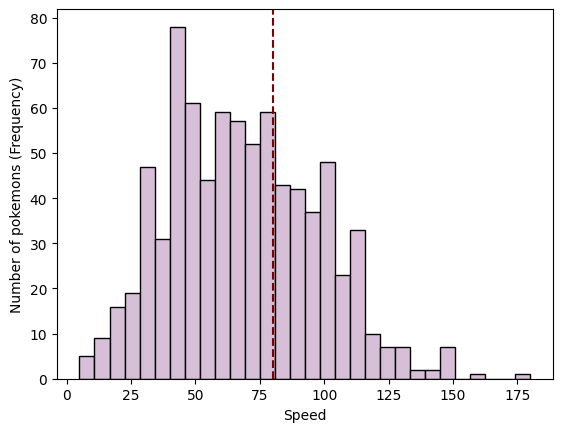

In [96]:
# Teamwork

# How many Pokémons are with 'Type 1' == Water as a % of total?
type_1_water = pokemon_df[pokemon_df['Type 1'] == 'Water']
print(f'{len(type_1_water)} are Type 1 "Water" pokemons')
perc_water = ((len(type_1_water))*100)/(len(pokemon_df['Type 1']))
print(f'The percentage of Water Type 1 pokemons is {perc_water}%')

# What is the maximum 'Speed' value? What is the minimum 'Speed' value? What is the difference between max and min 'Speed'?
max_speed = pokemon_df['Speed'].max()
min_speed = pokemon_df['Speed'].min()
difference = max_speed - min_speed
print(f'Maximum speed value is {max_speed}, minimum value is {min_speed}, and the difference between max and min is {difference}.')

# Filter the DataFrame to include only the Pokémon with 'Speed' >= 80. How many Pokémon meet this criterion? Display this DataFrame using your preferred visualization method.
speed_above_80 = pokemon_df[pokemon_df['Speed'] >= 80]
print(f'{len(speed_above_80)} have Speed above 80')
plt.hist(pokemon_df['Speed'], bins=30, color='thistle', edgecolor='black')
plt.xlabel('Speed')
plt.ylabel('Number of pokemons (Frequency)')
plt.axvline(80, linestyle='dashed', color='maroon')

# (DIFFICULT) Find Pokémon with the longest name (excluding spaces)? What is this pokemons name?
pokemon_df['Length of Names'] = pokemon_df['Name'].str.replace(" ", "").str.len()
longest_name = pokemon_df['Name'].iloc[pokemon_df['Length of Names'].idxmax()]
print(f"The pokemon with the longest name is {longest_name}, it is {pokemon_df['Length of Names'].max()} characters long")
